In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *

## **Read Dataset**

In [3]:
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [4]:
image_classes = os.listdir('/kaggle/input/covid19-image-dataset/Covid19-dataset/train')
image_classes

['Normal', 'Viral Pneumonia', 'Covid']

## **Data Visualization**

In [5]:
def plot_images(image_classes):
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(1,3, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

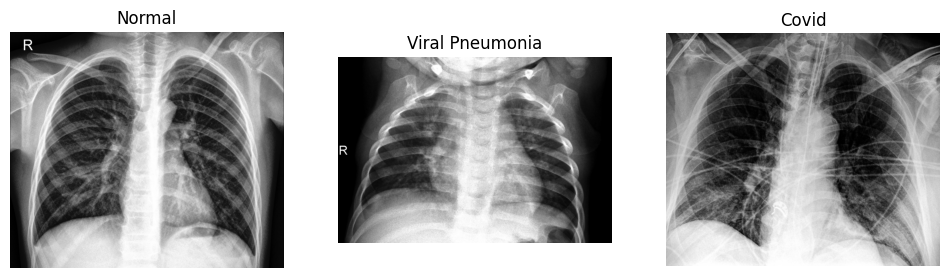

In [6]:
plot_images(image_classes)

## **Image Preprocessing**

In [7]:
image_gen = ImageDataGenerator(rescale = 1/255)

In [8]:
train_data = image_gen.flow_from_directory(train_path,
                                          target_size = (224,224),
                                          )

Found 251 images belonging to 3 classes.


In [9]:
test_data = image_gen.flow_from_directory(test_path,
                                          target_size = (224,224),
                                          )

Found 66 images belonging to 3 classes.


## **Model Building**

In [10]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                activation = 'relu', input_shape = [224,224, 3]))

cnn_model.add(MaxPooling2D(pool_size = (2,2)))

cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                activation = 'relu'))

cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                activation = 'relu'))

cnn_model.add(MaxPooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(128, activation = 'relu'))

cnn_model.add(Dense(3, activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## **Compile & Fit Model**

In [11]:
cnn_model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [13]:
model_history = cnn_model.fit(train_data, 
             epochs = 5,
             validation_data = test_data)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/8 ━━━━━━━━━━━━━━━━━━━━ 1:56 17s/step - accuracy: 0.4062 - loss: 1.0909

I0000 00:00:1711114220.586708     171 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711114220.604409     171 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4869 - loss: 1.1634

W0000 00:00:1711114228.394444     170 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4964 - loss: 1.1583 - val_accuracy: 0.5758 - val_loss: 0.8889
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.7893 - loss: 0.5983 - val_accuracy: 0.7576 - val_loss: 0.7780
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - accuracy: 0.9297 - loss: 0.1845 - val_accuracy: 0.6818 - val_loss: 0.5644
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.8983 - loss: 0.2577 - val_accuracy: 0.7727 - val_loss: 0.4870
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.9126 - loss: 0.1506 - val_accuracy: 0.9242 - val_loss: 0.3054


## **Model Performance Visualization**

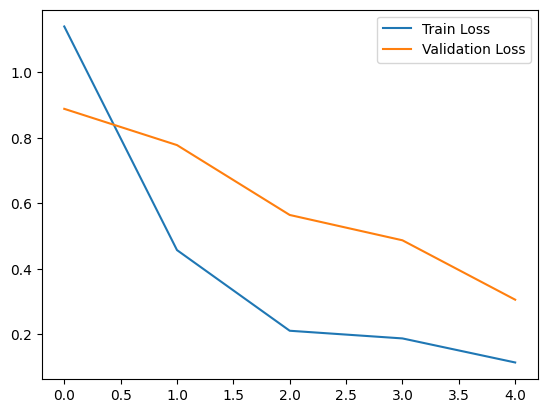

In [14]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

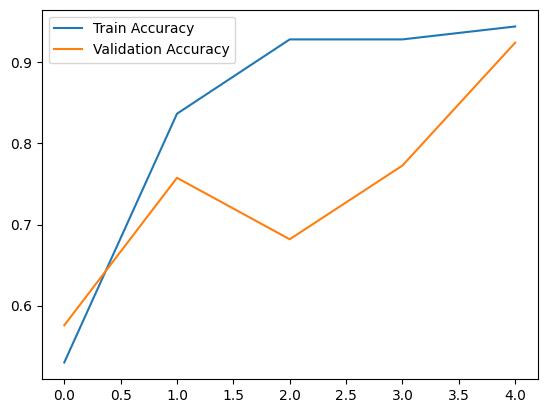

In [15]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

## **Model Evaluation**

In [16]:
cnn_model.evaluate(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.9192 - loss: 0.2250


[0.20310495793819427, 0.9242424368858337]

In [17]:
cnn_model.evaluate(train_data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 613ms/step - accuracy: 0.9811 - loss: 0.0621


[0.06567183881998062, 0.9840637445449829]

## **Make Prediction**

In [18]:
testing_image = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0106.jpeg'

In [19]:
class_map = dict([value, key] for key, value in train_data.class_indices.items())
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [20]:
import numpy as np
def prediction(testing_image, actual_label):
    
    #preprocessing image
    test_img = image.load_img(testing_image, target_size = (224,224))
    test_img_array = image.img_to_array(test_img) / 255
    test_img_input = test_img_array.reshape(1, test_img_array.shape[0],
                                           test_img_array.shape[1],
                                           test_img_array.shape[2])
    
    
    #make prediction
    predicted_class = np.argmax(cnn_model.predict(test_img_input))
    class_img = class_map[predicted_class]
    
    plt.figure(figsize = (4,4))
    plt.imshow(test_img_array)
    plt.title("Actual Label : {} , Predicted Label : {}".format(actual_label, class_img))
    
    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step


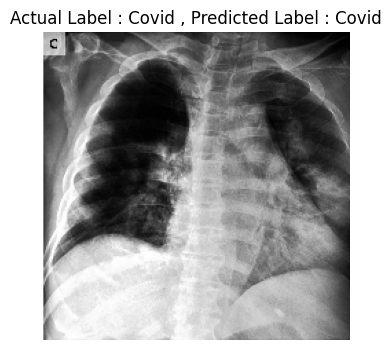

In [21]:
prediction(testing_image, actual_label = 'Covid')

In [22]:
cnn_model.save("Covid_19_model.h5")